## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [71]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings('ignore')

In [72]:
pd.options.display.max_columns = None

# Preparation of Dataset

## Accessing the different datasets

### Box Office Mojo Website

In [73]:

box_movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
box_movie_gross_df.head(10)

# This dataset contains the domestic and foreign revenue generated by different movies from Box Office Movie Mojo

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [74]:
# unifying naming convention in title column
box_movie_gross_df["title"] = box_movie_gross_df["title"].str.title()
box_movie_gross_df["title"] = box_movie_gross_df["title"].str.strip()

In [75]:
#Removing instances where date might be on the movie title and special characters
box_movie_gross_df['title'] = box_movie_gross_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)
box_movie_gross_df['title'] = box_movie_gross_df['title'].str.replace(r'[^\w\s]', '',regex=True)


In [76]:
box_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [77]:
box_movie_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice In Wonderland,BV,334200000.0,691300000,2010
2,Harry Potter And The Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How To Train Your Dragon,P/DW,217600000.0,277300000,2010


### Moviesdb Website

In [78]:

moviesdb_df =pd.read_csv("zippedData/tmdb.movies.csv.gz")

moviesdb_df.head(10)

#dataset contains moviesdb ratings of different titles


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [79]:
# converting all string to title case and stripped and removing special characters
moviesdb_df = moviesdb_df.applymap(lambda x:x.strip()  if isinstance(x,str)else x)
moviesdb_df = moviesdb_df.applymap(lambda x:x.title()  if isinstance(x,str)else x)
moviesdb_df['original_title'] = moviesdb_df['original_title'].str.replace(r'[^\w\s]', '',regex=True)
moviesdb_df['title'] = moviesdb_df['title'].str.replace(r'[^\w\s]', '',regex=True)

In [80]:
#renaming some columns for easier readability
moviesdb_df= moviesdb_df.rename(columns={"vote_average":"moviedb_average_rating", "vote_count":"moviedb_number_of_votes"})

In [81]:
moviesdb_df.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,moviedb_average_rating,moviedb_number_of_votes
0,0,"[12, 14, 10751]",12444,En,Harry Potter And The Deathly Hallows Part 1,33.533,2010-11-19,Harry Potter And The Deathly Hallows Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,En,How To Train Your Dragon,28.734,2010-03-26,How To Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,En,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,En,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,En,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,En,Percy Jackson The Olympians The Lightning Thief,26.691,2010-02-11,Percy Jackson The Olympians The Lightning Thief,6.1,4229
6,6,"[28, 12, 14, 878]",19995,En,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,En,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,En,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,En,Megamind,22.855,2010-11-04,Megamind,6.8,3635


### Rotten Tomato Website

In [82]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep='\t')
rt_movie_info.head(10)

#contains movie info from rotten tomatoes website

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [83]:
rt_reviews_df = pd.read_csv("zippedData/rt.reviews.tsv.gz",sep="\t",encoding="latin_1")
rt_reviews_df.head(10)


#contains reviews of various movies from the rotten tomato website

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


### The Numbers Website

In [84]:
thenumbers_df =pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

thenumbers_df.head(10)

# contains the production budget and revenue of various movies sourced from the Numbers website

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [85]:
thenumbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [86]:
# Removing special characters from the movie title name
thenumbers_df['movie'] = thenumbers_df['movie'].str.replace(r'[^\w\s]', '',regex=True)

In [87]:
# stripping the movie title and keeping them on title case
thenumbers_df['movie'] = thenumbers_df['movie'].str.strip()
thenumbers_df['movie'] = thenumbers_df['movie'].str.title()

In [88]:
thenumbers_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates Of The Caribbean On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers Age Of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep Viii The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep Vii The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates Of The Caribbean At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


### IMDB website

In [89]:
conn=sqlite3.connect("zippedData/im.db")
cur= conn.cursor()

In [90]:
%%script sqlite3 zippedData/im.db --out tables
.tables
.quit

In [91]:
print(tables)

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      



In [92]:
query = """ 
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.original_title,
    mb.genres,
    mb.start_year AS release_year,
    mb.runtime_minutes AS film_runtime,
    mr.averagerating AS imdb_average_rating,
    mr.numvotes AS imdb_number_of_votes,
    GROUP_CONCAT(DISTINCT(p.primary_name)) AS directors
FROM movie_basics AS mb
LEFT JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
JOIN
directors AS d
USING (movie_id)
JOIN
persons AS p
USING (person_id)
GROUP BY mb.movie_id;
"""

imdb_df=pd.read_sql(query,conn)

In [93]:
imdb_df.sample(20)

,movie_id,primary_title,original_title,genres,release_year,film_runtime,imdb_average_rating,imdb_number_of_votes,directors
41515,tt2556766,Behind the Sword in the Stone,Behind the Sword in the Stone,Documentary,2013,NaN,NaN,NaN,"Alec Moore,Mark Wright"
28892,tt2144079,Le combat des chefs,Le combat des chefs,Documentary,2011,48.0,NaN,NaN,Jean-François Amiguet
122623,tt7829372,Der lange Abschied von der Kohle,Der lange Abschied von der Kohle,Documentary,2017,NaN,NaN,NaN,Werner Kubny
98811,tt5960066,Red Garden,Pomegranate Garden,Drama,2016,90.0,7.4,7.0,Ilgar Najaf
8951,tt1568815,A Family,En familie,Drama,2010,102.0,6.7,1132.0,Pernille Fischer Christensen
107700,tt6556486,The First Shot,The First Shot,Documentary,2017,76.0,NaN,NaN,"Cheng Yan,Federico Francioni"
7194,tt1464335,Uncharted,Uncharted,"Action,Adventure",2020,NaN,NaN,NaN,Dan Trachtenberg
40854,tt2523098,Leuenklinge,Leuenklinge,Fantasy,2010,140.0,7.6,9.0,Nicolas Mendrek
79994,tt4736550,Untitled Sony Hack Documentary,Untitled Sony Hack Documentary,Documentary,2016,NaN,4.3,6.0,Jehane Noujaim
11014,tt1640605,Scary Story Slumber Party,Scary Story Slumber Party,"Horror,Thriller",2017,76.0,2.7,109.0,"John Johnson,Jonathan Moody,Coven Delacruz,Myk..."


In [94]:
# converting strings into title case and stripped
imdb_df = imdb_df.applymap(lambda x:x.strip() if isinstance(x,str)else x)
imdb_df = imdb_df.applymap(lambda x:x.title() if isinstance(x,str)else x)
imdb_df['primary_title'] = imdb_df['primary_title'].str.replace(r'[^\w\s]', '',regex=True)
imdb_df['original_title'] = imdb_df['original_title'].str.replace(r'[^\w\s]', '',regex=True)

In [95]:
imdb_df.head(20)

,movie_id,primary_title,original_title,genres,release_year,film_runtime,imdb_average_rating,imdb_number_of_votes,directors
0,Tt0063540,Sunghursh,Sunghursh,"Action,Crime,Drama",2013,175.0,7.0,77.0,Harnam Singh Rawail
1,Tt0066787,One Day Before The Rainy Season,Ashad Ka Ek Din,"Biography,Drama",2019,114.0,7.2,43.0,Mani Kaul
2,Tt0069049,The Other Side Of The Wind,The Other Side Of The Wind,Drama,2018,122.0,6.9,4517.0,Orson Welles
3,Tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,"Comedy,Drama",2018,NaN,6.1,13.0,Hrishikesh Mukherjee
4,Tt0100275,The Wandering Soap Opera,La Telenovela Errante,"Comedy,Drama,Fantasy",2017,80.0,6.5,119.0,"Raoul Ruiz,Valeria Sarmiento"
5,Tt0111414,A Thin Life,A Thin Life,Comedy,2018,75.0,NaN,NaN,Frank Howson
6,Tt0112502,Bigfoot,Bigfoot,"Horror,Thriller",2017,NaN,4.1,32.0,Mc Jones
7,Tt0137204,Joe Finds Grace,Joe Finds Grace,"Adventure,Animation,Comedy",2017,83.0,8.1,263.0,Anthony Harrison
8,Tt0139613,O Silêncio,O Silêncio,"Documentary,History",2012,NaN,NaN,NaN,"José Manuel Alves Pereira,António Loja Neves"
9,Tt0144449,Nema Aviona Za Zagreb,Nema Aviona Za Zagreb,Biography,2012,82.0,NaN,NaN,Louis Van Gasteren


## Merging dataset

### merging imdb dataset to

In [96]:
# Merging the imdb website with the numbers website

merged_imdb_the_numbers = imdb_df.merge(thenumbers_df, left_on= "primary_title",right_on = "movie", how = "inner")

In [97]:
# Merge the merged dataset to the moviedb website
merged_to_moviedb = merged_imdb_the_numbers.merge(moviesdb_df,left_on = "primary_title", right_on = "original_title", how = "inner")

In [98]:
# Merge the merged dataset to the box office website
merged_to_box_office = merged_to_moviedb.merge(box_movie_gross_df, left_on = "primary_title", right_on="title", how = "inner")

In [99]:
merged_to_box_office.head()

,movie_id,primary_title,original_title_x,genres,release_year,film_runtime,imdb_average_rating,imdb_number_of_votes,directors,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,title_x,moviedb_average_rating,moviedb_number_of_votes,title_y,studio,domestic_gross_y,foreign_gross,year
0,Tt0337692,On The Road,On The Road,"Adventure,Drama,Romance",2012,124.0,6.1,37886.0,Walter Salles,17,"Mar 22, 2013",On The Road,"$25,000,000","$720,828","$9,313,302",5350,"[12, 18]",83770,En,On The Road,8.919,2012-12-21,On The Road,5.6,518,On The Road,IFC,744000.0,8000000,2012
1,Tt2404548,On The Road,On The Road,Drama,2011,90.0,NaN,NaN,Harutyun Azaryan,17,"Mar 22, 2013",On The Road,"$25,000,000","$720,828","$9,313,302",5350,"[12, 18]",83770,En,On The Road,8.919,2012-12-21,On The Road,5.6,518,On The Road,IFC,744000.0,8000000,2012
2,Tt3872966,On The Road,On The Road,Documentary,2013,87.0,NaN,NaN,Marvin Dau,17,"Mar 22, 2013",On The Road,"$25,000,000","$720,828","$9,313,302",5350,"[12, 18]",83770,En,On The Road,8.919,2012-12-21,On The Road,5.6,518,On The Road,IFC,744000.0,8000000,2012
3,Tt4339118,On The Road,On The Road,Drama,2014,89.0,6.0,6.0,Poong-Ki Kim,17,"Mar 22, 2013",On The Road,"$25,000,000","$720,828","$9,313,302",5350,"[12, 18]",83770,En,On The Road,8.919,2012-12-21,On The Road,5.6,518,On The Road,IFC,744000.0,8000000,2012
4,Tt5389486,On The Road,On The Road,Documentary,2015,39.0,NaN,NaN,Maxim Sliussarev,17,"Mar 22, 2013",On The Road,"$25,000,000","$720,828","$9,313,302",5350,"[12, 18]",83770,En,On The Road,8.919,2012-12-21,On The Road,5.6,518,On The Road,IFC,744000.0,8000000,2012


In [100]:
merged_to_box_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3257 entries, 0 to 3256
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_id                 3257 non-null   object 
 1   primary_title            3257 non-null   object 
 2   original_title_x         3257 non-null   object 
 3   genres                   3230 non-null   object 
 4   release_year             3257 non-null   int64  
 5   film_runtime             3001 non-null   float64
 6   imdb_average_rating      2431 non-null   float64
 7   imdb_number_of_votes     2431 non-null   float64
 8   directors                3257 non-null   object 
 9   id_x                     3257 non-null   int64  
 10  release_date_x           3257 non-null   object 
 11  movie                    3257 non-null   object 
 12  production_budget        3257 non-null   object 
 13  domestic_gross_x         3257 non-null   object 
 14  worldwide_gross         

In [101]:
#dropping duplicated columns caused by merging of the dataset
merged_to_box_office=merged_to_box_office.drop(["movie_id","original_title_x","id_x","movie","Unnamed: 0","genre_ids","id_y","original_title_y","title_x","title_y"], axis = 1)

In [102]:
merged_to_box_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3257 entries, 0 to 3256
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   primary_title            3257 non-null   object 
 1   genres                   3230 non-null   object 
 2   release_year             3257 non-null   int64  
 3   film_runtime             3001 non-null   float64
 4   imdb_average_rating      2431 non-null   float64
 5   imdb_number_of_votes     2431 non-null   float64
 6   directors                3257 non-null   object 
 7   release_date_x           3257 non-null   object 
 8   production_budget        3257 non-null   object 
 9   domestic_gross_x         3257 non-null   object 
 10  worldwide_gross          3257 non-null   object 
 11  original_language        3257 non-null   object 
 12  popularity               3257 non-null   float64
 13  release_date_y           3257 non-null   object 
 14  moviedb_average_rating  

In [103]:
# dealing with date columns
# release_year
merged_to_box_office['release_year'] = pd.to_datetime(merged_to_box_office['release_year'], format='%Y')
# release_date_x
merged_to_box_office['release_date_x'] = pd.to_datetime(merged_to_box_office['release_date_x'],format='%b %d, %Y' ,yearfirst= True, errors= 'raise')
#release_date_y
merged_to_box_office['release_date_y'] = pd.to_datetime(merged_to_box_office['release_date_y'],format = "%Y-%m-%d", yearfirst= True,errors = "raise")
#year
merged_to_box_office['year'] = pd.to_datetime(merged_to_box_office['year'],format='%Y')



In [104]:
#creating a column that will store the year a movie released
merged_to_box_office['release_year'] = merged_to_box_office['release_year'].dt.year



In [105]:
# creating a column that will store the month a movie was released
merged_to_box_office['release_month'] = merged_to_box_office['release_date_x'].dt.month_name()

In [106]:
#filling null values in release_year
merged_to_box_office['release_year'] = merged_to_box_office['release_year'].fillna(merged_to_box_office['release_date_x'].dt.year).fillna(merged_to_box_office['release_date_y'].dt.year).fillna(merged_to_box_office['year'].dt.year)

#filling null values in release_month
merged_to_box_office['release_month'] = merged_to_box_office['release_month'].fillna(merged_to_box_office['release_date_y'].dt.month_name())

In [107]:
# Dropping the extra date columns

merged_to_box_office=merged_to_box_office.drop(["release_date_x","release_date_y","year"], axis= 1)

In [108]:
merged_to_box_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3257 entries, 0 to 3256
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   primary_title            3257 non-null   object 
 1   genres                   3230 non-null   object 
 2   release_year             3257 non-null   int64  
 3   film_runtime             3001 non-null   float64
 4   imdb_average_rating      2431 non-null   float64
 5   imdb_number_of_votes     2431 non-null   float64
 6   directors                3257 non-null   object 
 7   production_budget        3257 non-null   object 
 8   domestic_gross_x         3257 non-null   object 
 9   worldwide_gross          3257 non-null   object 
 10  original_language        3257 non-null   object 
 11  popularity               3257 non-null   float64
 12  moviedb_average_rating   3257 non-null   float64
 13  moviedb_number_of_votes  3257 non-null   int64  
 14  studio                  

In [109]:
#changed the currency columns from string datatype to float
merged_to_box_office['production_budget'] = merged_to_box_office['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)
merged_to_box_office['domestic_gross_x']= merged_to_box_office['domestic_gross_x'].replace({'\$': '', ',': ''}, regex=True).astype(float)
merged_to_box_office['foreign_gross'] = merged_to_box_office['foreign_gross'].replace({'\$': '', ',': ''},regex= True).astype(float)
merged_to_box_office['worldwide_gross']= merged_to_box_office['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [110]:
#unifying the domestic gross column
merged_to_box_office['domestic_gross']=merged_to_box_office['domestic_gross_x']
merged_to_box_office['domestic_gross']=merged_to_box_office['domestic_gross'].fillna(merged_to_box_office['domestic_gross_y'])

#unifying the foreign gross column

merged_to_box_office["worldwide_gross"]= merged_to_box_office['worldwide_gross'].fillna(merged_to_box_office['foreign_gross'])


In [111]:
#dropping duplicated currency columns
merged_to_box_office = merged_to_box_office.drop(['domestic_gross_x','domestic_gross_y'],axis = 1)

In [112]:
merged_to_box_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3257 entries, 0 to 3256
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   primary_title            3257 non-null   object 
 1   genres                   3230 non-null   object 
 2   release_year             3257 non-null   int64  
 3   film_runtime             3001 non-null   float64
 4   imdb_average_rating      2431 non-null   float64
 5   imdb_number_of_votes     2431 non-null   float64
 6   directors                3257 non-null   object 
 7   production_budget        3257 non-null   float64
 8   worldwide_gross          3257 non-null   float64
 9   original_language        3257 non-null   object 
 10  popularity               3257 non-null   float64
 11  moviedb_average_rating   3257 non-null   float64
 12  moviedb_number_of_votes  3257 non-null   int64  
 13  studio                   3257 non-null   object 
 14  foreign_gross           

In [113]:
columns = merged_to_box_office.columns.to_list()
columns

['primary_title',
 'genres',
 'release_year',
 'film_runtime',
 'imdb_average_rating',
 'imdb_number_of_votes',
 'directors',
 'production_budget',
 'worldwide_gross',
 'original_language',
 'popularity',
 'moviedb_average_rating',
 'moviedb_number_of_votes',
 'studio',
 'foreign_gross',
 'release_month',
 'domestic_gross']

In [114]:
columns_reordered= ['primary_title',
 'genres',
 'directors',
 'studio',
 'release_year',
 'release_month',
 'film_runtime',
 'imdb_average_rating',
 'imdb_number_of_votes',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'original_language',
 'popularity','foreign_gross',
 'moviedb_average_rating',
 'moviedb_number_of_votes']

merged_to_box_office = merged_to_box_office[columns_reordered]
merged_to_box_office.head()

,primary_title,genres,directors,studio,release_year,release_month,film_runtime,imdb_average_rating,imdb_number_of_votes,production_budget,domestic_gross,worldwide_gross,original_language,popularity,foreign_gross,moviedb_average_rating,moviedb_number_of_votes
0,On The Road,"Adventure,Drama,Romance",Walter Salles,IFC,2012,March,124.0,6.1,37886.0,25000000.0,720828.0,9313302.0,En,8.919,8000000.0,5.6,518
1,On The Road,Drama,Harutyun Azaryan,IFC,2011,March,90.0,NaN,NaN,25000000.0,720828.0,9313302.0,En,8.919,8000000.0,5.6,518
2,On The Road,Documentary,Marvin Dau,IFC,2013,March,87.0,NaN,NaN,25000000.0,720828.0,9313302.0,En,8.919,8000000.0,5.6,518
3,On The Road,Drama,Poong-Ki Kim,IFC,2014,March,89.0,6.0,6.0,25000000.0,720828.0,9313302.0,En,8.919,8000000.0,5.6,518
4,On The Road,Documentary,Maxim Sliussarev,IFC,2015,March,39.0,NaN,NaN,25000000.0,720828.0,9313302.0,En,8.919,8000000.0,5.6,518


In [115]:
conn.close()

In [116]:
merged_dataset = merged_to_box_office.copy()

# Data cleaning

In [117]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3257 entries, 0 to 3256
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   primary_title            3257 non-null   object 
 1   genres                   3230 non-null   object 
 2   directors                3257 non-null   object 
 3   studio                   3257 non-null   object 
 4   release_year             3257 non-null   int64  
 5   release_month            3257 non-null   object 
 6   film_runtime             3001 non-null   float64
 7   imdb_average_rating      2431 non-null   float64
 8   imdb_number_of_votes     2431 non-null   float64
 9   production_budget        3257 non-null   float64
 10  domestic_gross           3257 non-null   float64
 11  worldwide_gross          3257 non-null   float64
 12  original_language        3257 non-null   object 
 13  popularity               3257 non-null   float64
 14  foreign_gross           

In [118]:
# dropping duplicated values in instances where the movie_name,genre,directors and release year are the same
merged_dataset.duplicated(subset=['primary_title','genres','directors','release_year']).sum()

1375

In [119]:
merged_dataset.drop_duplicates(subset=['primary_title','genres','directors','release_year'],keep="first",inplace=True)

In [120]:
merged_dataset.duplicated(subset=['primary_title','genres','directors','release_year']).sum()

0

In [121]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 3256
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   primary_title            1882 non-null   object 
 1   genres                   1869 non-null   object 
 2   directors                1882 non-null   object 
 3   studio                   1882 non-null   object 
 4   release_year             1882 non-null   int64  
 5   release_month            1882 non-null   object 
 6   film_runtime             1765 non-null   float64
 7   imdb_average_rating      1620 non-null   float64
 8   imdb_number_of_votes     1620 non-null   float64
 9   production_budget        1882 non-null   float64
 10  domestic_gross           1882 non-null   float64
 11  worldwide_gross          1882 non-null   float64
 12  original_language        1882 non-null   object 
 13  popularity               1882 non-null   float64
 14  foreign_gross           

In [122]:
# Filling null values in the film_runtime,imdb_average_rating,imdb_number_of_votes

merged_dataset.describe()

,release_year,film_runtime,imdb_average_rating,imdb_number_of_votes,production_budget,domestic_gross,worldwide_gross,popularity,foreign_gross,moviedb_average_rating,moviedb_number_of_votes
count,1882.000000,1765.000000,1620.000000,1.620000e+03,1.882000e+03,1.882000e+03,1.882000e+03,1882.000000,1.579000e+03,1882.000000,1882.000000
mean,2013.964400,102.670822,6.408272,1.054000e+05,4.478262e+07,5.769024e+07,1.404995e+08,11.718874,9.341485e+07,6.305579,1871.593518
std,2.618648,24.550306,1.037359,1.569574e+05,5.226539e+07,8.234746e+07,2.231678e+08,7.549406,1.447132e+08,1.004416,2554.983166
min,2010.000000,3.000000,1.600000,5.000000e+00,2.700000e+04,0.000000e+00,0.000000e+00,0.600000,6.000000e+02,1.000000,1.000000
25%,2012.000000,91.000000,5.800000,7.844750e+03,1.000000e+07,6.907268e+06,1.590741e+07,7.823000,9.450000e+06,5.800000,287.000000
50%,2014.000000,103.000000,6.500000,5.040000e+04,2.550000e+07,3.055370e+07,5.751250e+07,10.542000,3.630000e+07,6.300000,955.000000
75%,2016.000000,116.000000,7.100000,1.281955e+05,5.500000e+07,7.139912e+07,1.567500e+08,14.641000,1.052000e+08,6.900000,2386.000000
max,2021.000000,280.000000,9.200000,1.841066e+06,4.106000e+08,7.000596e+08,2.048134e+09,80.773000,9.464000e+08,10.000000,22186.000000


In [123]:
#film_runtime
#Null values we are going to fill with the mean values

merged_dataset['film_runtime'] = merged_dataset['film_runtime'].fillna(merged_dataset['film_runtime'].mean())

#imdb_average_rating
#Null values are goin to be filled by the mean
merged_dataset['imdb_average_rating'] = merged_dataset['imdb_average_rating'].fillna(merged_dataset['imdb_average_rating'].mean())

#imdb_number_of_votes
#Null values are going to be filled by the median because it less affected by extreme values
merged_dataset['imdb_number_of_votes'] = merged_dataset['imdb_number_of_votes'].fillna(merged_dataset['imdb_number_of_votes'].median())

In [124]:
#genre
#Null values will be filled with unknown
merged_dataset['genres']=merged_dataset['genres'].fillna('unknown')

In [125]:
#Limiting imdb_average_rating,moviedb_average_rating to one decimal place

merged_dataset[['imdb_average_rating', 'moviedb_average_rating']] = merged_dataset[['imdb_average_rating', 'moviedb_average_rating']].round(1)

#Changing some columns from float to intergers
merged_dataset=merged_dataset.astype({'film_runtime':'int64','imdb_number_of_votes':'int64','production_budget':'int64','domestic_gross':'int64','worldwide_gross':'int64','popularity':'int64'})


In [126]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 3256
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   primary_title            1882 non-null   object 
 1   genres                   1882 non-null   object 
 2   directors                1882 non-null   object 
 3   studio                   1882 non-null   object 
 4   release_year             1882 non-null   int64  
 5   release_month            1882 non-null   object 
 6   film_runtime             1882 non-null   int64  
 7   imdb_average_rating      1882 non-null   float64
 8   imdb_number_of_votes     1882 non-null   int64  
 9   production_budget        1882 non-null   int64  
 10  domestic_gross           1882 non-null   int64  
 11  worldwide_gross          1882 non-null   int64  
 12  original_language        1882 non-null   object 
 13  popularity               1882 non-null   int64  
 14  foreign_gross           

In [127]:
#renaming some columns in plural form
merged_dataset = merged_dataset.rename(columns={"primary_title":"title","genres":"genre","directors":"director"})

#FEATURE ENGINEERING ROI COLUMN

In [128]:
merged_dataset['ROI'] = (((merged_dataset['worldwide_gross'] - merged_dataset['production_budget']) / merged_dataset['production_budget']) * 100).round(2)
merged_dataset

,title,genre,director,studio,release_year,release_month,film_runtime,imdb_average_rating,imdb_number_of_votes,production_budget,domestic_gross,worldwide_gross,original_language,popularity,foreign_gross,moviedb_average_rating,moviedb_number_of_votes,ROI
0,On The Road,"Adventure,Drama,Romance",Walter Salles,IFC,2012,March,124,6.1,37886,25000000,720828,9313302,En,8,8000000.0,5.6,518,-62.75
1,On The Road,Drama,Harutyun Azaryan,IFC,2011,March,90,6.4,50400,25000000,720828,9313302,En,8,8000000.0,5.6,518,-62.75
2,On The Road,Documentary,Marvin Dau,IFC,2013,March,87,6.4,50400,25000000,720828,9313302,En,8,8000000.0,5.6,518,-62.75
3,On The Road,Drama,Poong-Ki Kim,IFC,2014,March,89,6.0,6,25000000,720828,9313302,En,8,8000000.0,5.6,518,-62.75
4,On The Road,Documentary,Maxim Sliussarev,IFC,2015,March,39,6.4,50400,25000000,720828,9313302,En,8,8000000.0,5.6,518,-62.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,Instant Family,"Comedy,Drama",Sean Anders,Par.,2018,November,118,7.4,46728,48000000,67363237,119736188,En,22,53200000.0,7.6,782,149.45
3253,Teen Titans Go To The Movies,"Action,Animation,Comedy","Aaron Horvath,Peter Rida Michail",WB,2018,July,84,6.8,12525,10000000,29790236,51620593,En,16,22300000.0,7.0,304,416.21
3254,Ben Is Back,Drama,Peter Hedges,RAtt.,2018,December,103,6.7,10402,13000000,3703182,9633111,En,17,NaN,6.7,254,-25.90
3255,Superfly,"Action,Crime,Thriller",Director X.,Sony,2018,June,116,5.0,4753,16000000,20537137,20723581,En,12,236000.0,6.5,130,29.52


In [129]:
cleaned_dataset = merged_dataset.copy()

In [130]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 3256
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    1882 non-null   object 
 1   genre                    1882 non-null   object 
 2   director                 1882 non-null   object 
 3   studio                   1882 non-null   object 
 4   release_year             1882 non-null   int64  
 5   release_month            1882 non-null   object 
 6   film_runtime             1882 non-null   int64  
 7   imdb_average_rating      1882 non-null   float64
 8   imdb_number_of_votes     1882 non-null   int64  
 9   production_budget        1882 non-null   int64  
 10  domestic_gross           1882 non-null   int64  
 11  worldwide_gross          1882 non-null   int64  
 12  original_language        1882 non-null   object 
 13  popularity               1882 non-null   int64  
 14  foreign_gross           

# Explolatory data analysis

In [131]:
# Finding the row index with the highest domestic gross
max_domestic_gross_index = cleaned_dataset['domestic_gross'].idxmax()

# Get the movie title with the highest domestic gross
movie_title_highest_gross = cleaned_dataset.loc[max_domestic_gross_index, 'title']

print("Movie Title with the Highest Domestic Gross Income:", movie_title_highest_gross)

Movie Title with the Highest Domestic Gross Income: Black Panther


In [132]:
genre_count = cleaned_dataset.copy()

# Split genre
genre_count['genre'] = genre_count['genre'].str.split(',')

# Explode genre into separate rows
genre_count = genre_count.explode('genre')

# Clean up any whitespace
genre_count['genre'] = genre_count['genre'].str.strip()

# Get genre counts
genre_distribution = genre_count['genre'].value_counts()
genre_distribution



Drama          946
Comedy         522
Action         438
Adventure      326
Thriller       298
Crime          247
Romance        227
Horror         194
Documentary    165
Biography      158
Fantasy        135
Mystery        134
Sci-Fi         125
Animation      102
Family          98
History         57
Music           57
Sport           34
War             19
unknown         13
Musical         12
Western         11
News             4
Name: genre, dtype: int64

In [133]:
# Calculate average ROI by genre
genre_roi = genre_count.groupby('genre')['ROI'].mean()

# Combine the analyses
genre_analysis = pd.DataFrame({
    'Count': genre_distribution,
    'Average_ROI': genre_roi
}).round(1)

genre_analysis

,Count,Average_ROI
Action,438,185.4
Adventure,326,222.2
Animation,102,289.3
Biography,158,208.3
Comedy,522,260.8
Crime,247,147.6
Documentary,165,227.9
Drama,946,251.7
Family,98,183.8
Fantasy,135,273.2


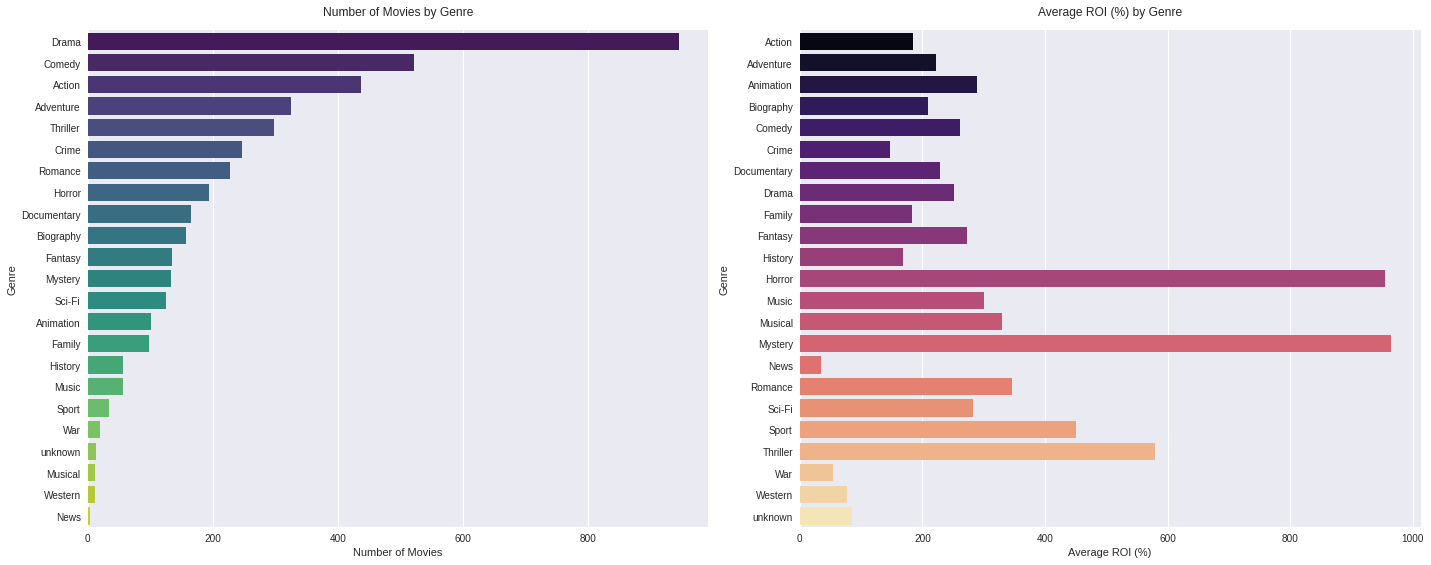

Most profitable genre (by avg ROI): Mystery (964.2%)
Least profitable genre (by avg ROI): News (34.5%)
Most common genre: Drama (946 movies)
Least common genre: News (4 movies)


In [135]:
def create_genre_visualizations(cleaned_dataset):
    
    # Set up the style
    plt.style.use('seaborn')
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Genre Distribution Bar Plot
    plt.subplot(2, 2, 1)
    sns.barplot(x=genre_distribution.values, 
                y=genre_distribution.index, 
                palette='viridis')
    plt.title('Number of Movies by Genre', pad=15, fontsize=12)
    plt.xlabel('Number of Movies')
    plt.ylabel('Genre')
    
    # 2. Average ROI by Genre Bar Plot
    plt.subplot(2, 2, 2)
    sns.barplot(x=genre_roi.values, 
                y=genre_roi.index, 
                palette='magma')
    plt.title('Average ROI (%) by Genre', pad=15, fontsize=12)
    plt.xlabel('Average ROI (%)')
    plt.ylabel('Genre')
    
    
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()
    
    print(f"Most profitable genre (by avg ROI): {genre_roi.idxmax()} ({genre_roi.max():.1f}%)")
    print(f"Least profitable genre (by avg ROI): {genre_roi.idxmin()} ({genre_roi.min():.1f}%)")
    print(f"Most common genre: {genre_distribution.idxmax()} ({genre_distribution.max()} movies)")
    print(f"Least common genre: {genre_distribution.idxmin()} ({genre_distribution.min()} movies)")
    
    
    return genre_analysis


genre_analysis = create_genre_visualizations(cleaned_dataset)

## Top ten movies in terms of gross income imdb movies


In [136]:
# Remove duplicates based on the title column
unique_movies = cleaned_dataset.drop_duplicates(subset='title')

# Find the top 10 movies with the highest domestic gross
top10_movies_domestic = unique_movies.nlargest(10, 'domestic_gross')['title'].tolist()

print("Top 10 Movies based on Domestic Gross Income:")
for movie in top10_movies_domestic:
    print(movie)

Top 10 Movies based on Domestic Gross Income:
Black Panther
Avengers Infinity War
Jurassic World
Incredibles 2
Rogue One A Star Wars Story
Beauty And The Beast
Finding Dory
Avengers Age Of Ultron
The Dark Knight Rises
The Hunger Games Catching Fire


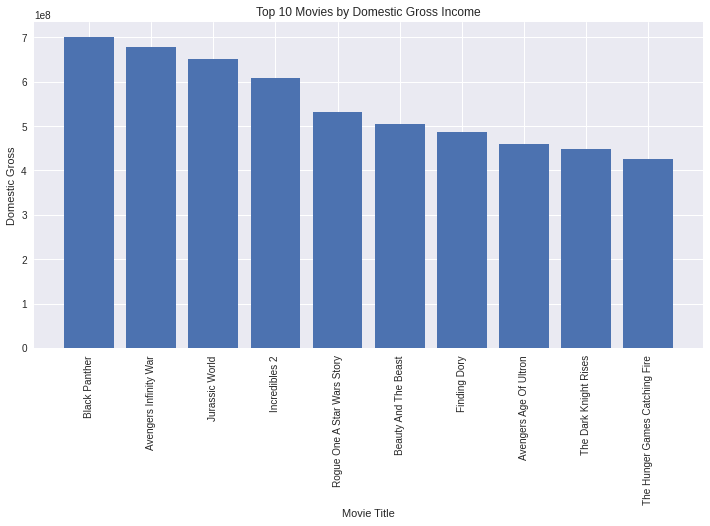

In [137]:
# Sort the dataframe by foreign_gross in descending order and select the top 10 rows
top_10_domestic = unique_movies.sort_values('domestic_gross', ascending=False).head(10)

# Extracting the movie titles from the title column
top_10_movies_domestic = top_10_domestic['title'].tolist()

# Extracting the domestic gross values for plotting
domestic_gross_values = top_10_domestic['domestic_gross']

# Creating a bar plot for the top 10 movies and foreign gross
plt.figure(figsize=(12, 6))
plt.bar(top_10_movies_domestic, domestic_gross_values)
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross')
plt.title('Top 10 Movies by Domestic Gross Income')
plt.xticks(rotation=90)
plt.show()

In [138]:
# Remove duplicates based on the title column
unique_movies = cleaned_dataset.drop_duplicates(subset='title')

# Find the top 10 movies with the highest domestic gross
top10_movies_worldwide = unique_movies.nlargest(10, 'worldwide_gross')['title'].tolist()

print("Top 10 Movies based on worldwide Gross Income:")
for movie in top10_movies_worldwide:
    print(movie)

Top 10 Movies based on worldwide Gross Income:
Avengers Infinity War
Jurassic World
Furious 7
Avengers Age Of Ultron
Black Panther
Jurassic World Fallen Kingdom
Frozen
Beauty And The Beast
Incredibles 2
The Fate Of The Furious


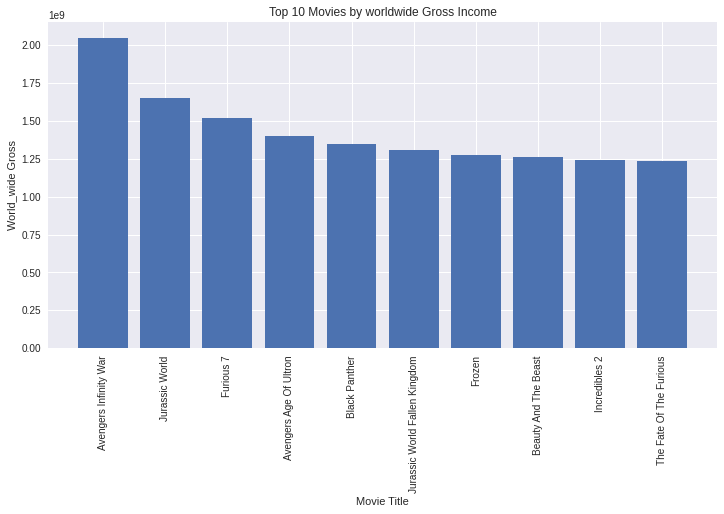

In [139]:

# Sort the dataframe by foreign_gross in descending order and select the top 10 rows
top_10_worldwide = unique_movies.sort_values('worldwide_gross', ascending=False).head(10)

# Extracting the movie titles from the title column
top_10_movies_worldwide = top_10_worldwide['title'].tolist()

# Extracting the domestic gross values for plotting
worldwide_gross_values = top_10_worldwide['worldwide_gross']

# Creating a bar plot for the top 10 movies and foreign gross
plt.figure(figsize=(12, 6))
plt.bar(top_10_movies_worldwide, worldwide_gross_values)
plt.xlabel('Movie Title')
plt.ylabel('World_wide Gross')
plt.title('Top 10 Movies by worldwide Gross Income')
plt.xticks(rotation=90)
plt.show()

In [140]:
unique_movies = cleaned_dataset.drop_duplicates(subset='title')

# Find the top 10 movies with the highest domestic gross
top10_movies_foreign = unique_movies.nlargest(10, 'foreign_gross')['title'].tolist()

print("Top 10 Movies based on foreign gross:")
for movie in top10_movies_foreign:
    print(movie)

Top 10 Movies based on foreign gross:
Avengers Age Of Ultron
Jurassic World Fallen Kingdom
Transformers Age Of Extinction
Minions
Aquaman
Iron Man 3
Pirates Of The Caribbean On Stranger Tides
Skyfall
Transformers Dark Of The Moon
Despicable Me 3


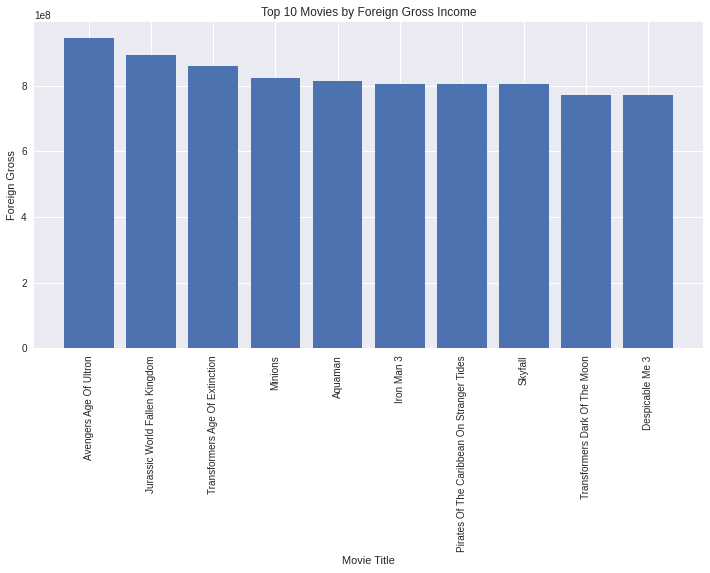

In [141]:
# Droping duplicates based on the title column
unique_movies = cleaned_dataset.drop_duplicates(subset='title')

# Sort the dataframe by foreign_gross in descending order and select the top 10 rows
top_10_foreign = unique_movies.sort_values('foreign_gross', ascending=False).head(10)

# Extracting the movie titles from the title column
top_10_movies_foreign = top_10_foreign['title'].tolist()

# Extracting the foreign gross values for plotting
foreign_gross_values = top_10_foreign['foreign_gross']

# Creating a bar plot for the top 10 movies and foreign gross
plt.figure(figsize=(12, 6))
plt.bar(top_10_movies_foreign, foreign_gross_values)
plt.xlabel('Movie Title')
plt.ylabel('Foreign Gross')
plt.title('Top 10 Movies by Foreign Gross Income')
plt.xticks(rotation=90)
plt.show()

#### It is evident that the movies are performing differently in the two markets. Those performing well at home are different from those performing well abroad in terms of income

## scatter plots for popularity against different incomes

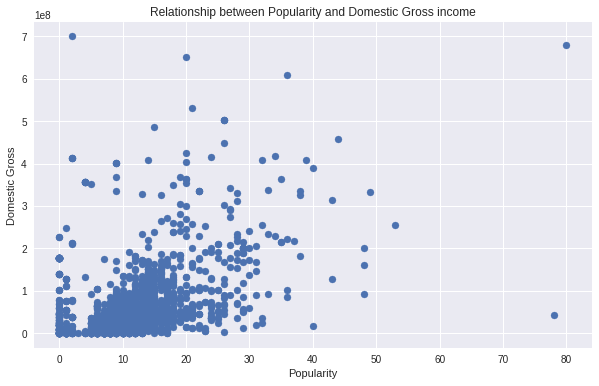

In [142]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_dataset['popularity'], cleaned_dataset['domestic_gross'])
plt.xlabel('Popularity')
plt.ylabel('Domestic Gross')
plt.title('Relationship between Popularity and Domestic Gross income')
plt.show()

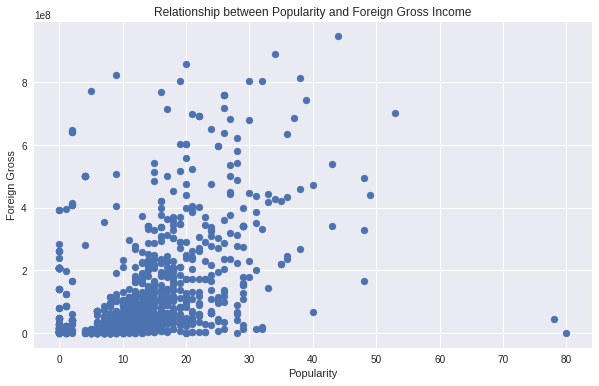

In [143]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_dataset['popularity'], cleaned_dataset['foreign_gross'])
plt.xlabel('Popularity')
plt.ylabel('Foreign Gross')
plt.title('Relationship between Popularity and Foreign Gross Income')
plt.show()

###  The scatter plots indicate a positive relationship. This is because the trend is moving upwards, suggesting that higher popularity tends to be associated with higher gross income. Here we can conclude that the more popular movies have a higher gross income in both domestic and foreign markets.

# Most popular movie


In [144]:
# Sort the DataFrame by popularity in descending order
sorted_df = cleaned_dataset.sort_values(by='popularity', ascending=False)

# Get the most popular title
most_popular_title = sorted_df.iloc[0]['title']

print("The most popular title is:", most_popular_title)

The most popular title is: Avengers Infinity War


## A plot of top ten IMDB movies based on popularity and their corresponding incomes

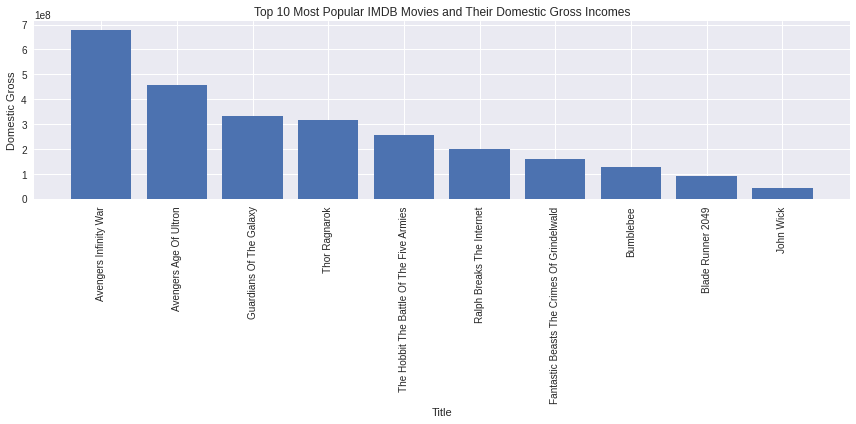

In [145]:
# Group the DataFrame by 'title' and calculate the mean popularity
title_popularity = cleaned_dataset.groupby('title')['popularity'].mean()

# Sort the titles based on mean popularity and select the top 10
top_10_titles = title_popularity.sort_values(ascending=False).head(10).index.tolist()

# Filter the DataFrame to include only the top 10 popular titles
top_10_df = cleaned_dataset[cleaned_dataset['title'].isin(top_10_titles)]

# Sort the DataFrame by 'domestic_gross' in descending order
top_10_df = top_10_df.sort_values('domestic_gross', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_df['title'], top_10_df['domestic_gross'])
plt.xlabel('Title')
plt.ylabel('Domestic Gross')
plt.title('Top 10 Most Popular IMDB Movies and Their Domestic Gross Incomes')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

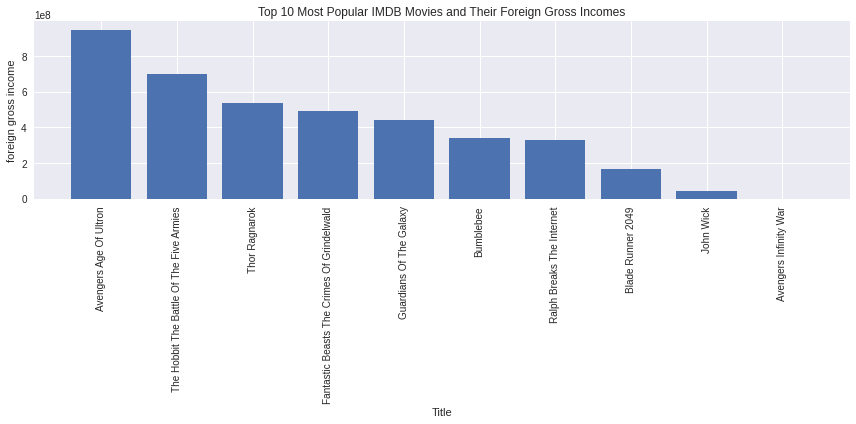

In [146]:
# Group the DataFrame by 'title' and calculate the mean popularity
title_popularity = cleaned_dataset.groupby('title')['popularity'].mean()

# Sort the titles based on mean popularity and select the top 10
top_10_titles = title_popularity.sort_values(ascending=False).head(10).index.tolist()

# Filter the DataFrame to include only the top 10 popular titles
top_10_df = cleaned_dataset[cleaned_dataset['title'].isin(top_10_titles)]

# Sort the DataFrame by 'foreign_gross' in descending order
top_10_df = top_10_df.sort_values('foreign_gross', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_df['title'], top_10_df['foreign_gross'])
plt.xlabel('Title')
plt.ylabel('foreign gross income')
plt.title('Top 10 Most Popular IMDB Movies and Their Foreign Gross Incomes')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

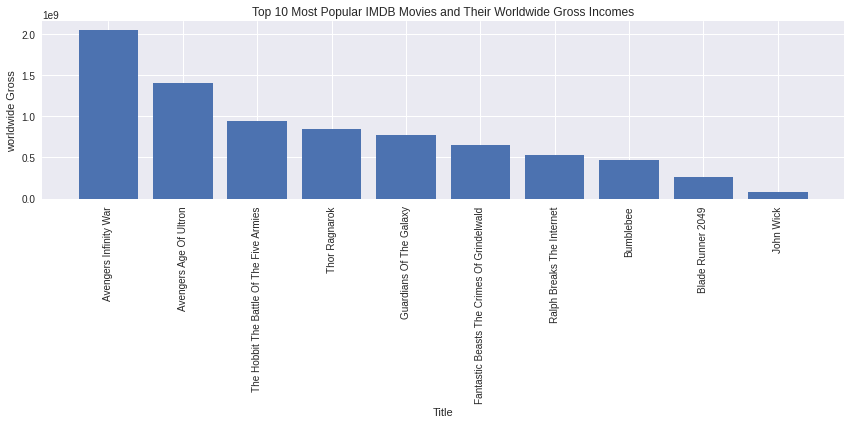

In [147]:
# Group the DataFrame by 'title' and calculate the mean popularity
title_popularity = cleaned_dataset.groupby('title')['popularity'].mean()

# Group the DataFrame by 'title' and calculate the mean popularity
title_popularity = cleaned_dataset.groupby('title')['popularity'].mean()

# Sort the titles based on mean popularity and select the top 10
top_10_titles = title_popularity.sort_values(ascending=False).head(10).index.tolist()

# Filter the DataFrame to include only the top 10 popular titles
top_10_df = cleaned_dataset[cleaned_dataset['title'].isin(top_10_titles)]

# Sort the DataFrame by 'world_gross' in descending order
top_10_df = top_10_df.sort_values('worldwide_gross', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_df['title'], top_10_df['worldwide_gross'])
plt.xlabel('Title')
plt.ylabel('worldwide Gross')
plt.title('Top 10 Most Popular IMDB Movies and Their Worldwide Gross Incomes')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [148]:
# Export to Excel for Tableau visualisation
cleaned_dataset.to_excel('cleaned_movies_dataset.xlsx', index=False)
genre_count.to_excel('genre_count_data.xlsx', index=False)

